# Simple Linear Regression on Sorting Time Data

**Delivery_time->** Predict delivery time using *Sorting Time*.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [2]:
dt = pd.read_csv('delivery_time.csv')

#### EDA on dataset

In [3]:
# Check first 5 records
dt.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Check last 5 records
dt.tail(5)

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
# Check for data types, non-null values & memory usage
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# Get central tendency, dispersion and shape of dataset’s distribution
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
# Checking Null values
dt.isnull().sum() * 100 / dt.shape[0]

Delivery Time    0.0
Sorting Time     0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [8]:
# Check for Skewness of all dataset columns
from scipy import stats
print("Skewness of Sorting Time is", stats.skew(dt['Sorting Time']))
print("Skewness of Delivery Time is", stats.skew(dt['Delivery Time']))

Skewness of Sorting Time is 0.043680994983108075
Skewness of Delivery Time is 0.326702631656106


<font size = 3 color = darkblue>As skewness for both *Sorting Time* and *Delivery Time* is between -0.5 and 0.5, the distribution is approximately symmetric. </font>

In [9]:
# Check for the column labels of the DataFrame
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [10]:
# Check the dimensions of the DataFrame
dt.shape

(21, 2)

In [11]:
# Check for the random sample from the DataFrame
dt.sample(5)

,Delivery Time,Sorting Time
7,9.50,3
14,12.03,3
16,13.75,6
15,14.88,4
8,17.90,10


#### Visualize data

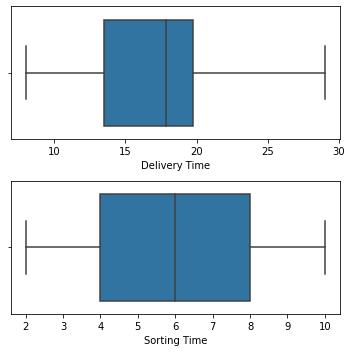

In [12]:
# Check for Outliers in dataset
fig, axs = plt.subplots(2, figsize = (5, 5))
plt1 = sns.boxplot(dt['Delivery Time'], ax = axs[0])
plt2 = sns.boxplot(dt['Sorting Time'], ax = axs[1])
plt.tight_layout()

<font size = 3 color = darkblue>There are no outliers present in the data.</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246A69E2AC8>,
      dtype=object)

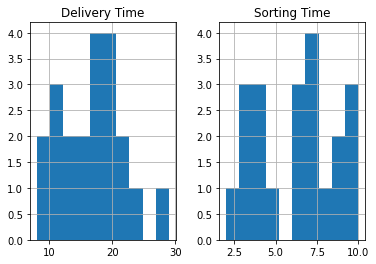

In [13]:
# Check for data normalization using histogram
dt.hist(column = ["Delivery Time", "Sorting Time"])

<font size = 3 color = darkblue>Both the data columns of the dataset are fairly normalized.</font>

#### Correlation Analysis

In [14]:
dt.corr(method = 'pearson')

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


The correlation between Sorting Time and weight gained is high (82.6%)

In [15]:
# Assign data to variables
x = dt['Sorting Time']
y = dt['Delivery Time']

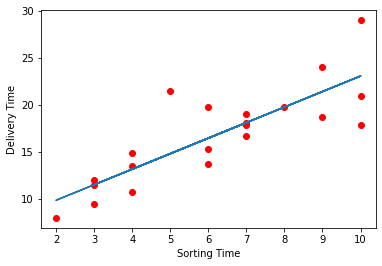

In [16]:
# Create Scatter plot
plt.scatter(x, y, color = 'red')

# m = slope, b = intercept
m, b = np.polyfit(x, y, 1)

# Add line of best fit
plt.plot(x, m*x + b)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

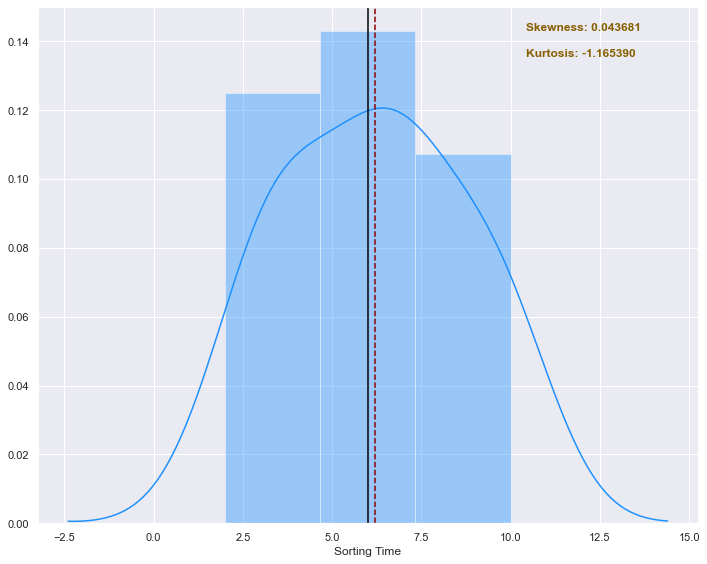

In [17]:
sns.set(color_codes = True)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

sns.distplot(x, color = "dodgerblue")
plt.axvline(np.mean(x), color = 'darkred', linestyle = '--')
plt.axvline(np.median(x), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()

plt.show()

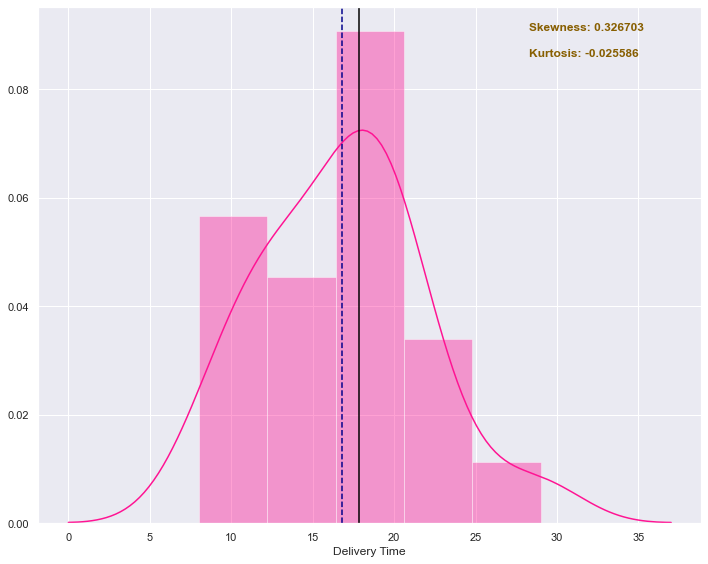

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.distplot(y, color = "deeppink");
plt.axvline(np.mean(y), color = 'darkblue', linestyle = '--')
plt.axvline(np.median(y), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')   #, backgroundcolor = 'white'
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()
plt.show()

<font size = 3 color = darkblue>From the above plots, we can say that *Delivery Time* and *Sorting Time* data is **fairly** distributed. There is no *outlier* in both the columns as there is no data point outside the *minimum and maximum value*.</font>

#### Build Simple Linear Regression Model

In [19]:
# Converting X to numpy.array
x = np.array(x).reshape(-1, 1)

In [20]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [21]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression()

In [22]:
# Fitting model
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([ 9.96281272, 14.77937102, 13.17385159, 17.99040989, 11.56833216])

In [24]:
# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [1.60551943]
Mean squared error: 10.98
Coefficient of determination: 0.56


In [25]:
predict = regr.predict(x)

In [26]:
predict

array([22.8069682 , 13.17385159, 16.38489046, 21.20144876, 22.8069682 ,
       16.38489046, 17.99040989, 11.56833216, 22.8069682 , 21.20144876,
       19.59592933, 13.17385159, 17.99040989, 11.56833216, 11.56833216,
       13.17385159, 16.38489046, 17.99040989,  9.96281272, 17.99040989,
       14.77937102])

In [27]:
score = r2_score(y_test, y_pred)
score

0.5559687341145618

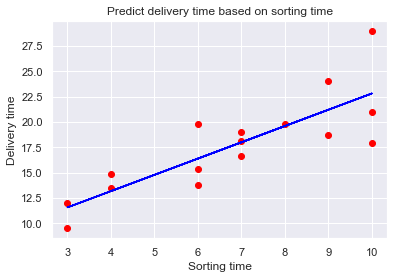

In [28]:
#visualize the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = "blue")
plt.title("Predict delivery time based on sorting time")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

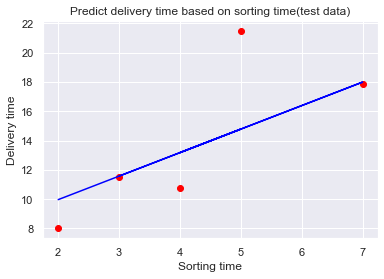

In [29]:
#visualize test results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regr.predict(X_test), color = "blue")
plt.title("Predict delivery time based on sorting time(test data)")
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()